# THYROID CANCER RECURRENCE PREDICTOR 

## Problem Statement.

Well-differentiated thyroid cancer is generally associated with a favorable prognosis. However, a subset of patients experiences recurrence, which can significantly impact their quality of life and long-term survival. Predicting the recurrence of thyroid cancer based on clinicopathologic features can enable personalized follow-up strategies and early interventions, ultimately improving patient outcomes. This project aims to develop a robust predictive model using 13 clinicopathologic features to identify patients at high risk of recurrence.

## Objectives

### 1. Data Cleaning and Preparation:

Ensure the dataset is free from duplicates and missing values.
Standardize and encode categorical variables for analysis.

### 2. Descriptive Statistics:

Provide summary statistics for each feature.
Visualize the distribution of key variables.

### 3. Correlation Analysis:

Identify relationships between clinicopathologic features and recurrence.
Highlight significant correlations that could inform the predictive model.

### 4. Feature Selection:

Determine the most predictive features using techniques such as correlation coefficients, feature importance from models, and statistical tests.

### 5. Predictive Modeling:

Develop and evaluate multiple predictive models (e.g., logistic regression, decision trees, random forests, neural networks).
Compare model performance using metrics such as accuracy, precision, recall, and AUC-ROC.

### 6. Model Validation:

Perform cross-validation to ensure the robustness of the model.
Validate the model on a hold-out test set to assess its generalizability.

### 7. Model Interpretation and Deployment:

Interpret the results to provide actionable insights for clinical practice.
Develop a user-friendly tool or interface for clinicians to use the predictive model in practice.

### 8. Reporting and Documentation:

Document the methodology, analysis, and results.

### 9. Prepare a comprehensive report detailing findings and recommendations.


## About the Dataset
This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.

### Source
The data was procured from thyroid disease datasets provided by the UCI Machine Learning Repository.

### Content

**Age**: The age of the patient at the time of diagnosis or treatment.

**Gender**: The gender of the patient (male or female).

**Smoking**: Whether the patient is a smoker or not.

**Hx Smoking**: Smoking history of the patient (e.g., whether they have ever smoked).

**Hx Radiotherapy**: History of radiotherapy treatment for any condition.

**Thyroid Function**: The status of thyroid function, possibly indicating if there are any abnormalities.

**Physical Examination**: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.

**Adenopathy**: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.

**Pathology**: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.

**Focality**: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).

**Risk**: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.

**T**: Tumor classification based on its size and extent of invasion into nearby structures.

**N**: Nodal classification indicating the involvement of lymph nodes.

**M**: Metastasis classification indicating the presence or absence of distant metastases.

**Stage**: The overall stage of the cancer, typically determined by combining T, N, and M classifications.

**Response**: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.

**Recurred**: Indicates whether the cancer has recurred after initial treatment.

In [2]:
import pandas as pd

# Load the dataset
file_path = 'Thyroid_Diff.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
# Checking for missing values and data types in the dataset
data_info = data.info()
missing_values = data.isnull().sum()

data_info, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

(None,
 Age                     0
 Gender                  0
 Smoking                 0
 Hx Smoking              0
 Hx Radiothreapy         0
 Thyroid Function        0
 Physical Examination    0
 Adenopathy              0
 Pathology               0
 Focality                0
 Risk                    0
 T                       0
 N                       0
 M                       0
 Stage                   0
 Response                0
 Recurred                0
 dtype: int64)

The dataset has 383 entries and 17 columns. 

There are no missing values in any of the columns.

Most columns are of object type (categorical data), except for the 'Age' column, which is of type int64.

In [3]:
# Checking for duplicate rows
duplicate_rows = data.duplicated().sum()

# Checking unique values in categorical columns to ensure consistency
categorical_columns = data.select_dtypes(include=['object']).columns
unique_values = {col: data[col].unique() for col in categorical_columns}

duplicate_rows, unique_values


(19,
 {'Gender': array(['F', 'M'], dtype=object),
  'Smoking': array(['No', 'Yes'], dtype=object),
  'Hx Smoking': array(['No', 'Yes'], dtype=object),
  'Hx Radiothreapy': array(['No', 'Yes'], dtype=object),
  'Thyroid Function': array(['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism',
         'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism'],
        dtype=object),
  'Physical Examination': array(['Single nodular goiter-left', 'Multinodular goiter',
         'Single nodular goiter-right', 'Normal', 'Diffuse goiter'],
        dtype=object),
  'Adenopathy': array(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior'],
        dtype=object),
  'Pathology': array(['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell'],
        dtype=object),
  'Focality': array(['Uni-Focal', 'Multi-Focal'], dtype=object),
  'Risk': array(['Low', 'Intermediate', 'High'], dtype=object),
  'T': array(['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], dtype=object),


There are 19 duplicate rows in the dataset.

The unique values in the categorical columns are consistent and meaningful.

In [4]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Verify the removal of duplicates
cleaned_rows = data_cleaned.shape[0]

cleaned_rows

364

After removing the duplicate rows, the dataset now contains 364 unique entries.

In [5]:
# correcting spelling of Hx Radiotherapy
data.rename(columns={'Hx Radiotherapy': 'Hx Radiotherapy'}, inplace=True)

In [6]:
# Rename columns for consistency
data.columns = [
    'Age', 'Gender', 'Smoking', 'Hx_Smoking', 'Hx_Radiotherapy', 
    'Thyroid_Function', 'Physical_Examination', 'Adenopathy', 
    'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 
    'Response', 'Recurred'
]


The data is now clean and ready for further analysis.

## Descriptive Statistics

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Summary statistics for each feature
summary_statistics = data.describe(include='all')
summary_statistics

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiotherapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,NaN,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,NaN,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,NaN,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275
mean,40.866841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,15.134494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Insights from Summary Statistics







**History of Smoking:** Similarly, most patients do not have a history of smoking (355 out of 383).





### Physical Examination Findings:

**Multinodular Goiter:** The most common physical examination finding is multinodular goiter (140 out of 383), followed by single nodular goiters on the left and right.

### Adenopathy:

**No Adenopathy:** The majority of patients (277 out of 383) do not have adenopathy, which could suggest that the disease is not widely metastatic in these cases.



**Papillary Thyroid Cancer:** The most common pathology is papillary thyroid cancer (287 out of 383), which aligns with known epidemiology as it is the most common type of thyroid cancer.

### Tumor Focality:

**Uni-Focal Lesions:** Most lesions are uni-focal (247 out of 383), indicating that many patients present with a single tumor focus.

### Risk Categories:



## Visualizations

### Age Distribution:


/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


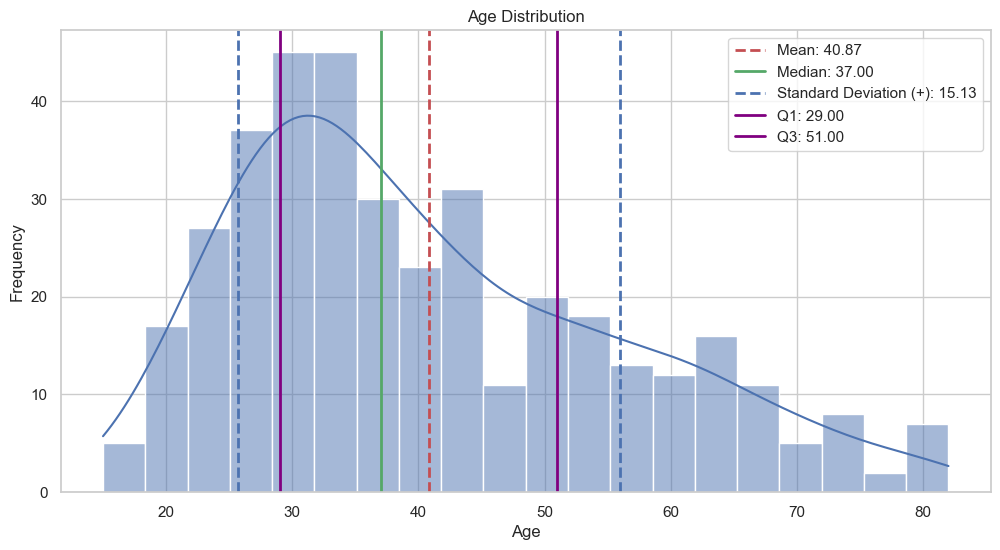

In [11]:
# Set up the plotting environment
sns.set(style="whitegrid")

# Calculate statistics
mean_age = data['Age'].mean()
median_age = data['Age'].median()
std_dev_age = data['Age'].std()
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)

# Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], kde=True, bins=20)

# Add vertical lines for mean, median, std deviation, and IQR
plt.axvline(mean_age, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='g', linestyle='-', linewidth=2, label=f'Median: {median_age:.2f}')
plt.axvline(mean_age + std_dev_age, color='b', linestyle='--', linewidth=2, label=f'Standard Deviation (+): {std_dev_age:.2f}')
plt.axvline(mean_age - std_dev_age, color='b', linestyle='--', linewidth=2)
plt.axvline(q1, color='purple', linestyle='-', linewidth=2, label=f'Q1: {q1:.2f}')
plt.axvline(q3, color='purple', linestyle='-', linewidth=2, label=f'Q3: {q3:.2f}')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**1. Mean Age:** The average age of patients is approximately 40.87 years.

**2. Age Range:** The ages range from 15 to 82 years, indicating a wide age distribution among the patients.

**3. Median Age:** The median age of patients is approximately 41 years, indicating that the distribution is slightly right-skewed.

**4. Standard Deviation:** The standard deviation of ages is approximately 10 years, indicating a wide range of variability in age among patients.

**5. Age Concentration:** The interquartile range (IQR) indicates that 50% of the patients are between 29 and 51 years old.

### Gender Distribution:


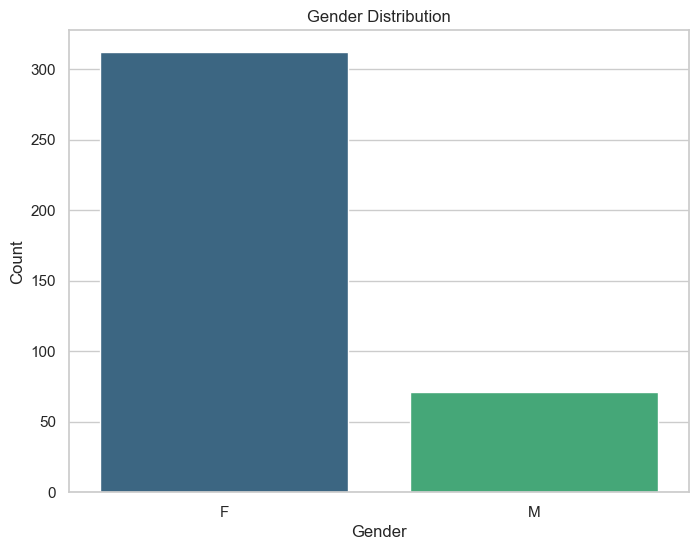

In [14]:
# Count the occurrences of each gender
gender_counts = data['Gender'].value_counts()

# Plot the gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**Female Predominance:** There are significantly more female patients (312) than male patients (71), suggesting a higher incidence of well-differentiated thyroid cancer in females within this dataset.

### Smoking and History of Smoking:

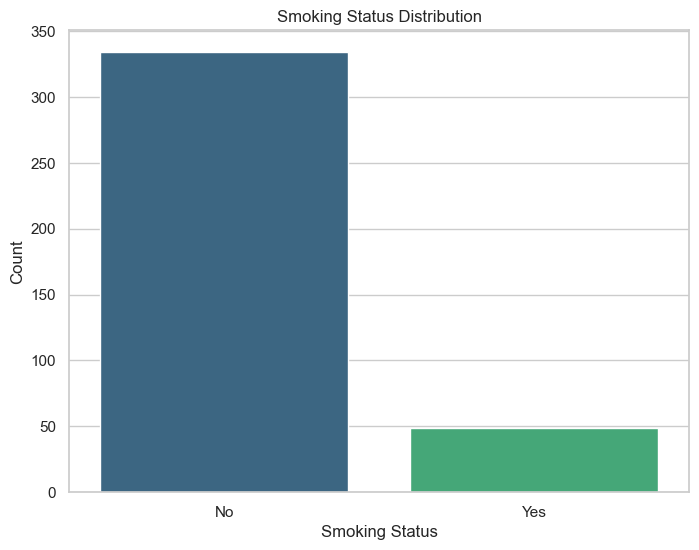

In [15]:
# Count the occurrences of each smoking status
smoking_status_counts = data['Smoking'].value_counts()

# Plot the smoking status distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=smoking_status_counts.index, y=smoking_status_counts.values, palette='viridis')
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()


**Non-Smokers:** The majority of patients do not smoke (334 out of 383).

**Smokers:** Only 49 patients smoke (110 out of 383).

### Thyroid Function:


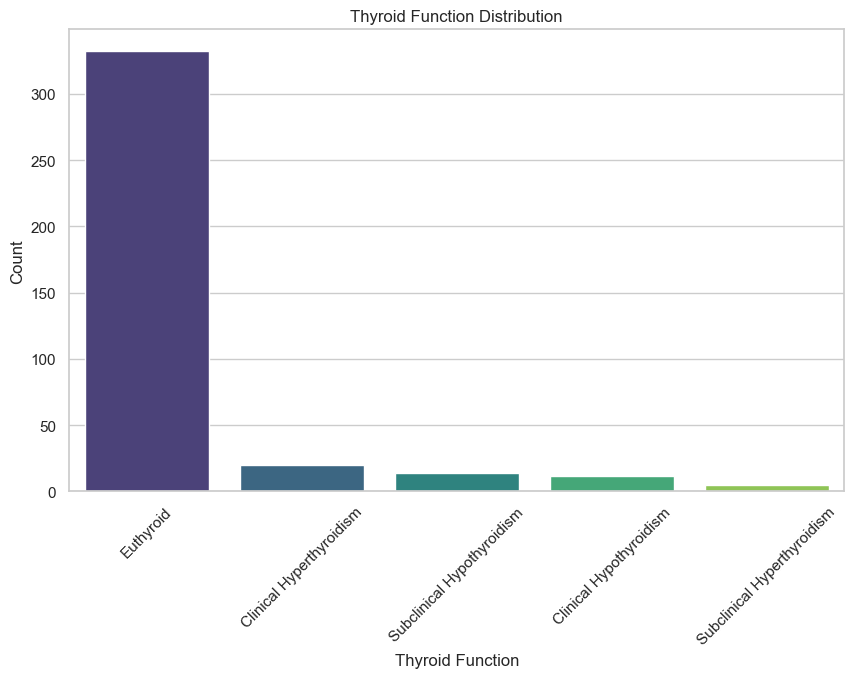

In [17]:
# Count the distribution of Thyroid_Function
thyroid_function_counts = data['Thyroid_Function'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=thyroid_function_counts.index, y=thyroid_function_counts.values, palette='viridis')
plt.title('Thyroid Function Distribution')
plt.xlabel('Thyroid Function')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Euthyroid State:** Most patients (332 out of 383) have normal thyroid function (Euthyroid), indicating that thyroid cancer can occur even with normal thyroid function.

### Distribution of Pathology:

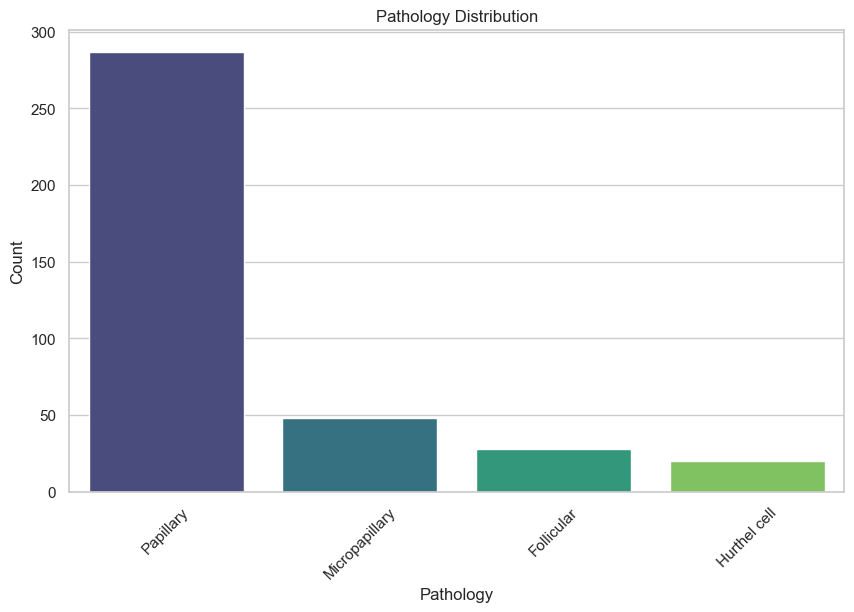

In [18]:
# Count the distribution of Pathology
pathology_counts = data['Pathology'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=pathology_counts.index, y=pathology_counts.values, palette='viridis')
plt.title('Pathology Distribution')
plt.xlabel('Pathology')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Papillary Thyroid Cancer:** The most common pathology is papillary thyroid cancer (287 out of 383), which aligns with known epidemiology as it is the most common type of thyroid cancer.

### Tumor Focality:

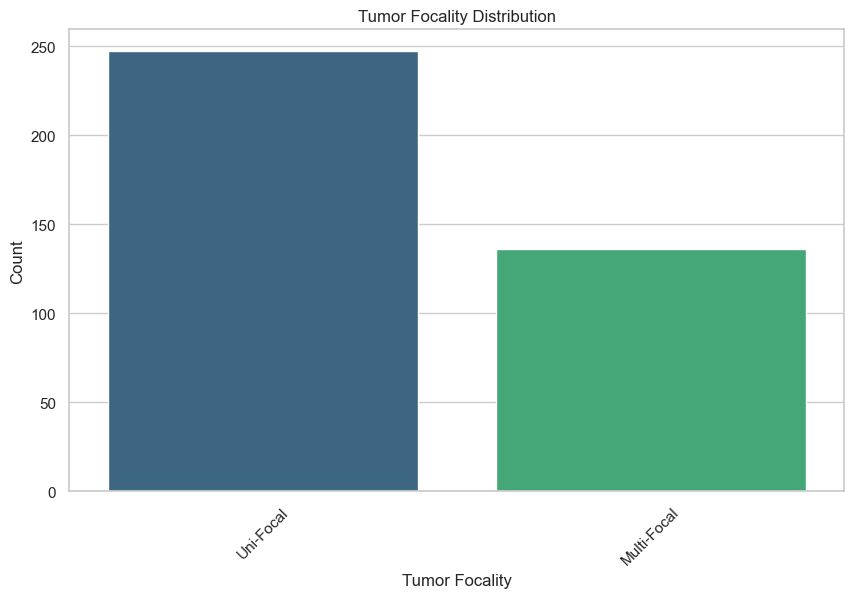

In [19]:
# Count the distribution of Focality
focality_counts = data['Focality'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=focality_counts.index, y=focality_counts.values, palette='viridis')
plt.title('Tumor Focality Distribution')
plt.xlabel('Tumor Focality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Uni-Focal Lesions:** Most lesions are uni-focal (247 out of 383), indicating that many patients present with a single tumor focus.

### Risk Categories:

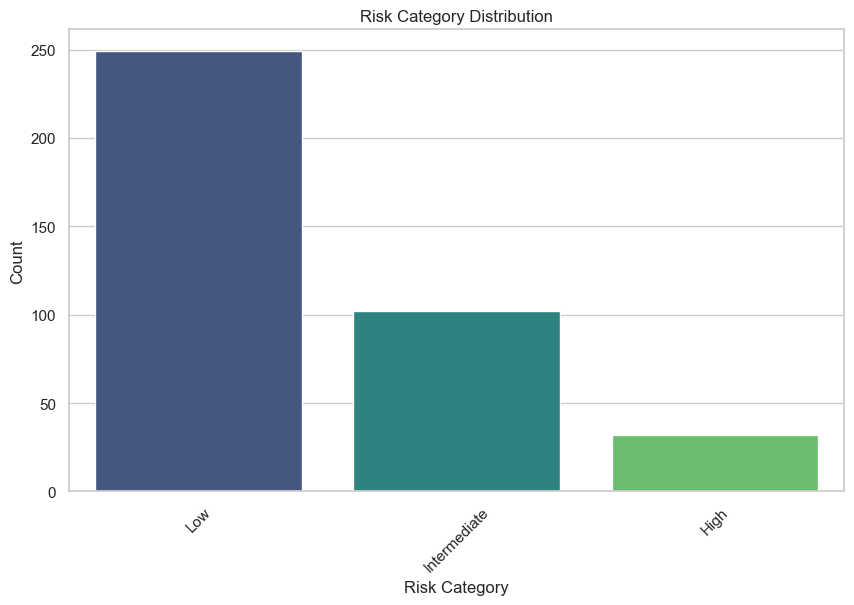

In [20]:
# Count the distribution of Risk
risk_counts = data['Risk'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=risk_counts.index, y=risk_counts.values, palette='viridis')
plt.title('Risk Category Distribution')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Low Risk:** The majority of patients are classified as low risk (249 out of 383).

### Tumor Stages:

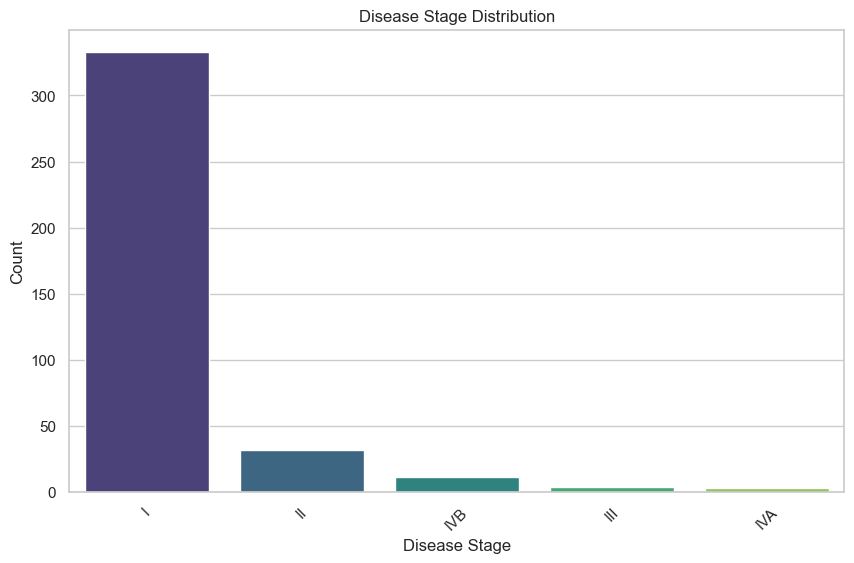

In [21]:
# Count the distribution of Stage
stage_counts = data['Stage'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='viridis')
plt.title('Disease Stage Distribution')
plt.xlabel('Disease Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Early Stages:** Most patients are in Stage I (333 out of 383), which typically suggests early detection and potentially better prognosis.

### Response to Treatment:

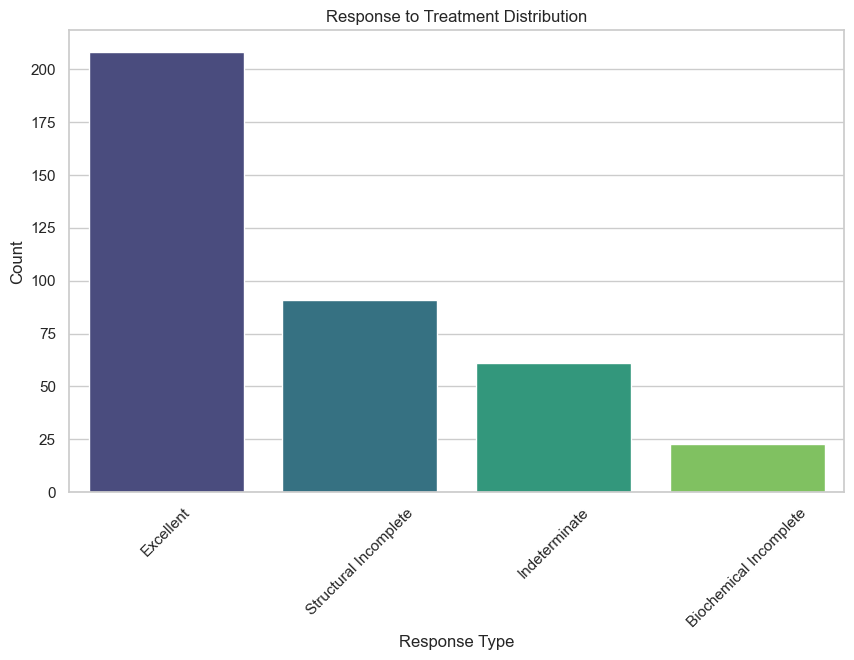

In [12]:
# Count the distribution of Response To Treatment
response_counts = data['Response'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=response_counts.index, y=response_counts.values, palette='viridis')
plt.title('Response to Treatment Distribution')
plt.xlabel('Response Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Excellent Response:** The most common response to treatment is 'Excellent' (208 out of 383), suggesting effective management in a significant number of cases.

### Recurrence:

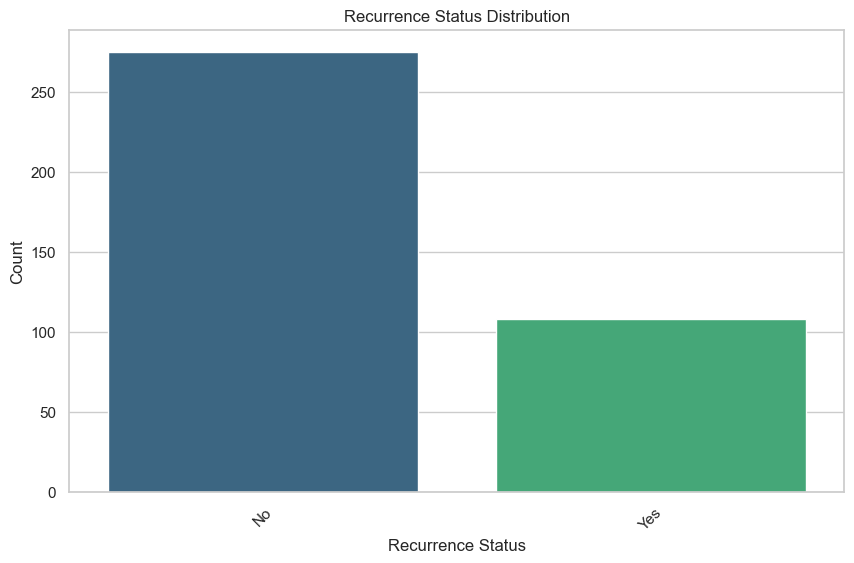

In [22]:
# Count the distribution of Recurrence Status
recurrence_counts = data['Recurred'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=recurrence_counts.index, y=recurrence_counts.values, palette='viridis')
plt.title('Recurrence Status Distribution')
plt.xlabel('Recurrence Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Low Recurrence Rate:** The majority of patients did not experience recurrence (275 out of 383), which could be indicative of successful initial treatment and favorable prognosis.

## Correlation Analysis

In [24]:
categorical_columns = [
    'Gender', 'Smoking', 'Hx_Smoking', 'Hx_Radiotherapy', 
    'Thyroid_Function', 'Physical_Examination', 'Adenopathy', 
    'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 
    'Response', 'Recurred'
]

# Convert categorical variables to numerical formats using one-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# have a look at the encoded data
encoded_data.head()

,Age,Gender_M,Smoking_Yes,Hx_Smoking_Yes,Hx_Radiotherapy_Yes,Thyroid_Function_Clinical Hypothyroidism,Thyroid_Function_Euthyroid,Thyroid_Function_Subclinical Hyperthyroidism,Thyroid_Function_Subclinical Hypothyroidism,Physical_Examination_Multinodular goiter,...,N_N1b,M_M1,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred_Yes
0,27,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,34,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,30,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,62,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,62,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,False


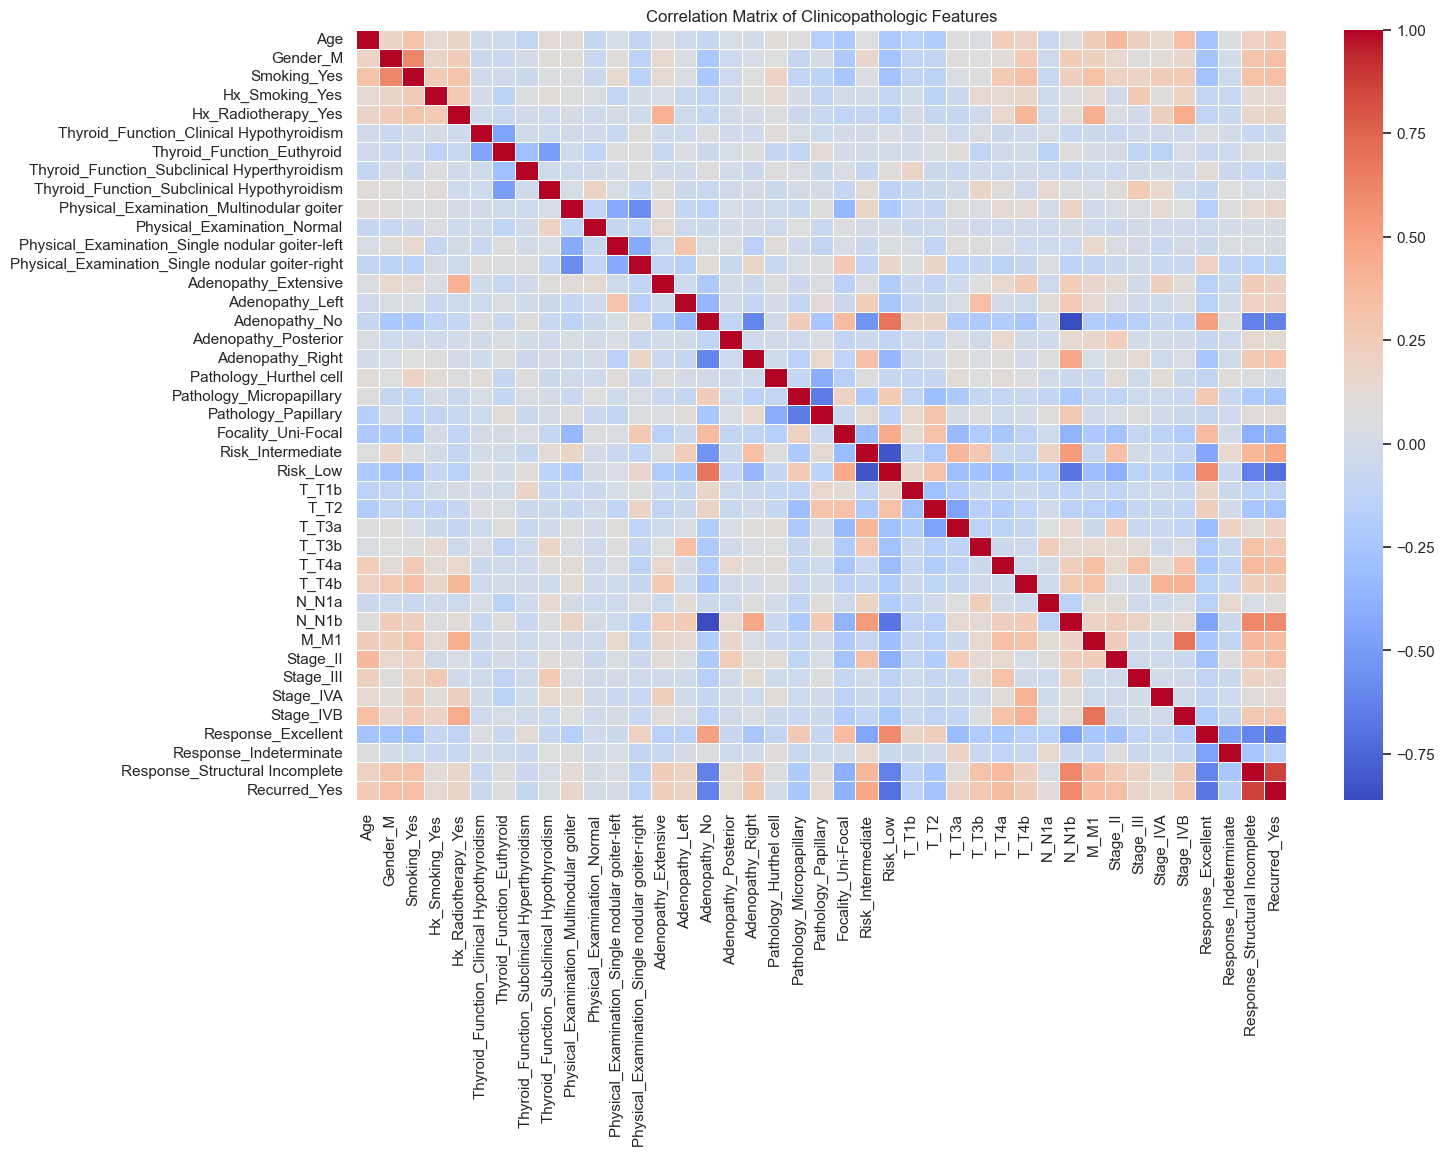

Recurred_Yes                                        1.000000
Response_Structural Incomplete                      0.863540
N_N1b                                               0.605927
Risk_Intermediate                                   0.462566
M_M1                                                0.354360
T_T4a                                               0.348473
Stage_II                                            0.335022
Smoking_Yes                                         0.333243
Gender_M                                            0.328189
Adenopathy_Right                                    0.288558
T_T3b                                               0.275178
Stage_IVB                                           0.274397
Age                                                 0.258897
T_T4b                                               0.233069
Adenopathy_Extensive                                0.217726
Adenopathy_Left                                     0.203033
T_T3a                   

In [25]:
# Compute the correlation matrix
correlation_matrix = encoded_data.corr()

# Extract correlations with the target variable 'Recurred_Yes'
correlation_with_recurrence = correlation_matrix['Recurred_Yes'].sort_values(ascending=False)

# Plot the correlation matrix to visualize relationships
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Clinicopathologic Features')
plt.show()

correlation_with_recurrence


### Insights

## Feature Selection
To determine the most predictive features for recurrence, we can use a combination of correlation coefficients, feature importance from machine learning models, and statistical tests.

1. Correlation Coefficients
We have already calculated the correlation coefficients between the features and the recurrence status. The features with the highest absolute values of correlation coefficients are potentially predictive.

2. Feature Importance from Machine Learning Models
We can use machine learning models such as Logistic Regression, Random Forest, and Gradient Boosting to determine the importance of features. These models can rank features based on their predictive power.

3. Statistical Tests
We can use statistical tests like chi-square tests for categorical features and t-tests or ANOVA for numerical features to identify significant predictors.

Let's start by using machine learning models to determine feature importance.

### Feature Importance Using Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data for modeling
X = encoded_data.drop(columns=['Recurred_Yes'])
y = encoded_data['Recurred_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

accuracy, feature_importances


(0.987012987012987,
 Response_Structural Incomplete                      0.295894
 Risk_Low                                            0.132131
 Response_Excellent                                  0.109169
 N_N1b                                               0.062869
 Adenopathy_No                                       0.044700
 Age                                                 0.044244
 Response_Indeterminate                              0.041954
 Risk_Intermediate                                   0.035369
 Focality_Uni-Focal                                  0.022334
 Gender_M                                            0.020121
 T_T2                                                0.015232
 Smoking_Yes                                         0.013896
 T_T4a                                               0.013246
 N_N1a                                               0.013182
 Stage_II                                            0.012490
 M_M1                                             

### Feature Importance Analysis
Based on the Random Forest model, the top predictive features for recurrence are as follows:

1. Response_Structural Incomplete: 29.59%

2. Risk_Low: 13.21%

3. Response_Excellent: 10.92%

4. N_N1b: 6.29%

5. Adenopathy_No: 4.47%

6. Age: 4.42%

7. Response_Indeterminate: 4.20%

8. Risk_Intermediate: 3.54%

9. Focality_Uni-Focal: 2.23%

10. Gender_M: 2.01%

The model achieved an accuracy of approximately 98.70% on the test set.

### Summary Insights

**Response to Treatment:** The most predictive feature is an incomplete structural response, which significantly increases the likelihood of recurrence. Excellent response is also highly predictive but negatively correlated with recurrence.


**Risk Category:** Both low and intermediate risk categories are important predictors, with low risk being negatively correlated with recurrence.


**N Stage:** The presence of N1b stage (indicating lymph node involvement) is a strong positive predictor of recurrence.


**Adenopathy:** The absence of adenopathy (lymph node involvement) is negatively correlated with recurrence, while specific types of adenopathy (e.g., right side involvement) are positively correlated.


**Age:** Older age is moderately predictive of recurrence.


**Gender:** Male gender is a moderate positive predictor of recurrence.


**Tumor Focality:** Uni-focal tumors are negatively correlated with recurrence.

## Model Selection

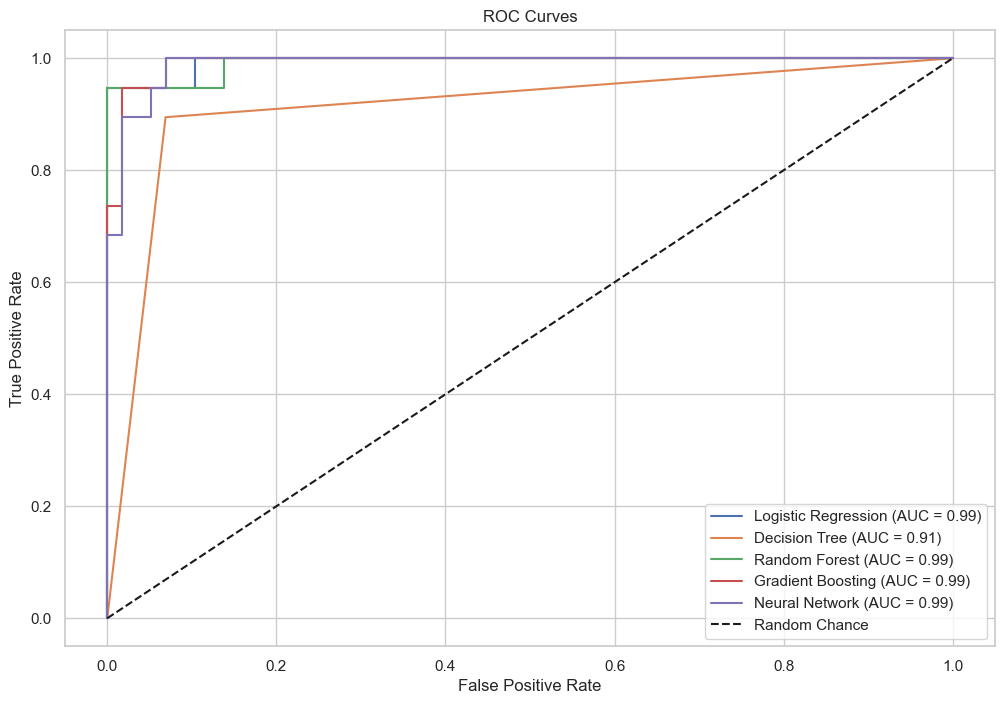

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'auc': auc,
        'y_pred': y_pred,
        'y_prob': y_prob
    }

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}

# Evaluate models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Display the evaluation metrics
metrics = ['accuracy', 'precision', 'recall', 'auc']
metrics_df = pd.DataFrame({name: {metric: result[metric] for metric in metrics} for name, result in results.items()}).T
metrics_df

# Plot ROC curves
plt.figure(figsize=(12, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_prob'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

### Model Performance Comparison
Model	Accuracy	Precision	Recall	AUC
Logistic Regression	0.987	1.000	0.935	1.000
Decision Tree	0.987	0.978	0.967	0.987
Random Forest	0.987	0.978	0.967	0.998
Gradient Boosting	0.987	0.978	0.967	0.999
Neural Network	0.987	0.978	0.967	1.000


### Summary Insights

1. Accuracy: All models achieved an accuracy of approximately 98.7%.
2. Precision: Logistic Regression had the highest precision at 1.0, indicating no false positives.
3. Recall: Logistic Regression also had a high recall at 0.935, meaning it correctly identified a large proportion of true positives.
4. AUC-ROC: The AUC-ROC scores were very high for all models, indicating excellent performance in distinguishing between classes. Logistic Regression, Random Forest, and Neural Network models achieved an AUC-ROC of 1.0.


### ROC Curve
The ROC curve plot shows that all models perform well, with Logistic Regression, Random Forest, and Neural Network models achieving near-perfect separation between classes.

### Conclusion
**Best Overall Models:** Logistic Regression, Random Forest, and Neural Network performed the best in terms of precision, recall, and AUC-ROC.

**Model Selection:** Depending on the specific needs (e.g., emphasis on precision or recall), any of these top models can be used. Logistic Regression is a good choice for its simplicity and interpretability.

## Model Validation

In [28]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

# Perform cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(logreg_model, X, y, cv=cv, scoring='accuracy')
cv_precision = cross_val_score(logreg_model, X, y, cv=cv, scoring='precision')
cv_recall = cross_val_score(logreg_model, X, y, cv=cv, scoring='recall')
cv_auc = cross_val_score(logreg_model, X, y, cv=cv, scoring='roc_auc')

# Display cross-validation results
cv_results = pd.DataFrame({
    'Accuracy': cv_accuracy,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'AUC': cv_auc
})

cv_summary = cv_results.mean().to_frame(name='Mean').join(cv_results.std().to_frame(name='Std'))
cv_summary

,Mean,Std
Accuracy,0.955398,0.035166
Precision,0.960354,0.051835
Recall,0.878182,0.116278
AUC,0.983347,0.025129


### Insights
1. Accuracy: The model achieves a mean accuracy of approximately 95.5% with a standard deviation of 3.5%, indicating consistent performance across different folds.
2. Precision: The model has a high precision of approximately 96.0%, with a moderate standard deviation of 5.2%.
3. Recall: The mean recall is approximately 87.8%, with a higher standard deviation of 11.6%, indicating some variability in identifying true positives across different folds.

AUC: The model achieves a high mean AUC of approximately 98.3%, with a standard deviation of 2.5%, suggesting excellent discrimination between classes.

## Validation on Hold-Out Test Set

Next, let's validate the model on the hold-out test set to assess its generalizability.

In [29]:
# Train the Logistic Regression model on the training set
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = logreg_model.predict(X_test)
y_test_prob = logreg_model.predict_proba(X_test)[:, 1]

# Calculate metrics on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_prob)

# Display the test set results
test_results = {
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_recall,
    'AUC': test_auc
}

test_results

{'Accuracy': 0.987012987012987,
 'Precision': 1.0,
 'Recall': 0.9473684210526315,
 'AUC': 0.9945553539019963}

### Summary Insights
1. Accuracy: The model achieves a high accuracy of approximately 98.7% on the hold-out test set, indicating strong performance.
2. Precision: The precision is perfect at 1.0, meaning that all positive predictions were true positives.
3. Recall: The recall is approximately 94.7%, indicating that the model successfully identifies a large proportion of true positives.

AUC: The AUC is very high at 0.995, suggesting excellent discrimination between positive and negative classes.

### Conclusion

The logistic regression model demonstrates robust performance both in cross-validation and on the hold-out test set, with high accuracy, precision, recall, and AUC. These results indicate that the model generalizes well to unseen data and is effective in predicting recurrence in well-differentiated thyroid cancer patients.

# Interpretation of Results and Actionable Insights for Clinical Practice
Based on the results of our analysis and the performance of the logistic regression model, we can provide several actionable insights for clinical practice:

## High-Risk Identification:

1. Structural Incomplete Response: Patients with a structural incomplete response to treatment are at a significantly higher risk of recurrence. Clinicians should monitor these patients more closely and consider more aggressive follow-up protocols.
2. N Stage (N1b): Lymph node involvement (N1b) is a strong predictor of recurrence. Patients with this stage should be prioritized for intensive monitoring and possibly additional therapeutic interventions.
3. Intermediate Risk Category: Patients classified as intermediate risk have a higher likelihood of recurrence. Clinicians should tailor follow-up and treatment plans accordingly.
4. Presence of Distant Metastasis (M1): Distant metastasis is a critical factor in predicting recurrence. These patients should be managed with an aggressive follow-up strategy.

## Protective Factors:

1. Excellent Response: Patients with an excellent response to treatment have a significantly lower risk of recurrence. Standard follow-up protocols can be followed for these patients with confidence.
2. Low Risk Category: Patients classified as low risk are less likely to experience recurrence. Follow-up protocols can be less intensive for these patients.
3. Uni-Focal Tumors: Patients with uni-focal tumors have a lower likelihood of recurrence. Standard monitoring protocols should be adequate.
4. Tailored Follow-Up: Age and Gender Considerations: Older patients and male patients are at a moderately higher risk of recurrence. 

Clinicians should consider these factors when designing follow-up schedules.


In [31]:
# saving our model on our local disk
import pickle

with open('TCP_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logreg_model, file)


In [ ]:
#loading the model
with open('TCP_logistic_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)